#### Importando cosas importantes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Lo divertido

#### Definiciones y funciones
Comenzamos con algunas funciones que sólo se necesitan correr una vez (funciones para clasificar, graficar y demás).

In [2]:
'''
Clasificación de matrices
'''
def classifier(matrixarr, tol):
    # Calcular parámetros
    tr, det = np.trace(matrixarr, axis1=1, axis2=2), np.linalg.det(matrixarr)
    delta = tr**2 - 4*det

    # Hacer un array "máscara" para cada uno de los casos
    # En áreas
    saddle = det < 0
    sink = np.logical_and(det > 0, np.logical_and(tr < 0, delta > 0))   # Retornan un array de booleanos dependiendo de las condiciones
    spiral_sink = np.logical_and(det > 0, np.logical_and(tr < 0, delta < 0))
    source = np.logical_and(det > 0, np.logical_and(tr > 0, delta > 0))
    spiral_source = np.logical_and(det > 0, np.logical_and(tr > 0, delta < 0))

    # Alrededor de líneas
    center = np.logical_and(det > 0, np.isclose(tr, 0, atol=tol))
    stable_fixed = np.logical_and(tr < 0, np.isclose(det, 0, atol=tol))
    degenerate_sink = np.logical_and(tr < 0, np.isclose(delta, 0, atol=tol))
    unstable_fixed = np.logical_and(tr > 0, np.isclose(det, 0, atol=tol))
    degenerate_source = np.logical_and(tr > 0, np.isclose(delta, 0, atol=tol))
    uniform = np.logical_and(np.isclose(tr, 0, atol=tol), np.isclose(det, 0, atol=tol))

    return tr, det, (saddle,sink,spiral_sink,source,spiral_source), (center,stable_fixed,degenerate_sink,unstable_fixed,degenerate_source,uniform)


'''
Graficación
'''
# Configuración de estilos de la gráfica
def style(fig,xlb='x',ylb='y', titl='y v x'):
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.grid(ls='--', zorder=0)
    fig.set_title(titl)
    fig.set_ylabel(ylb)
    fig.set_xlabel(xlb)
    fig.legend(loc='lower right')
    fig.set_xlim([-2.3,3.5])

# La gráfica en si
def matrixplot(fig1,tr,det, mask_a, mask_l):
    area_names = ('Saddle','Sink','Spiral sink','Source','Spiral source')
    line_names = ('Center','Stable fixed','Degenerate Sink','Unstable fixed','Degenerate source', 'Uniform')

    for i,col,leg in zip(range(len(mask_a)),
                         ('dark violet', 'dark red', 'dark orange', 'dark blue', 'green blue'), area_names):    # Aplicar las máscaras (arrays booleanos) a los datos originales 
        fig1.scatter(tr[mask_a[i]], det[mask_a[i]], marker='.', color='xkcd:'+col, label=leg+f': {100*[np.count_nonzero(x == True)/len(x) for x in mask_a][i]:.3f}%', linewidth=0.1, zorder=1)   

    for i,col,leg in zip(range(len(mask_l)),    # Los puntos que corresponden a áreas cercanas a las líneas son más gruesos
                         ('black', 'light red', 'light orange', 'light purple', 'light green', 'grey'), line_names):
        fig1.scatter(tr[mask_l[i]], det[mask_l[i]], marker='.', color='xkcd:'+col, label=leg+f': {100*[np.count_nonzero(x == True)/len(x) for x in mask_l][i]:.3f}%', linewidth=1, zorder=2)

#### Los cálculos

In [3]:
# Crear las matrices
matrices = np.random.uniform(-1, 1, size=(10**6, 2, 2))

# Traza, determinante y clasificación
tr, det, type_area, type_line =  classifier(matrices, 1.0e-3)

Y graficamos:

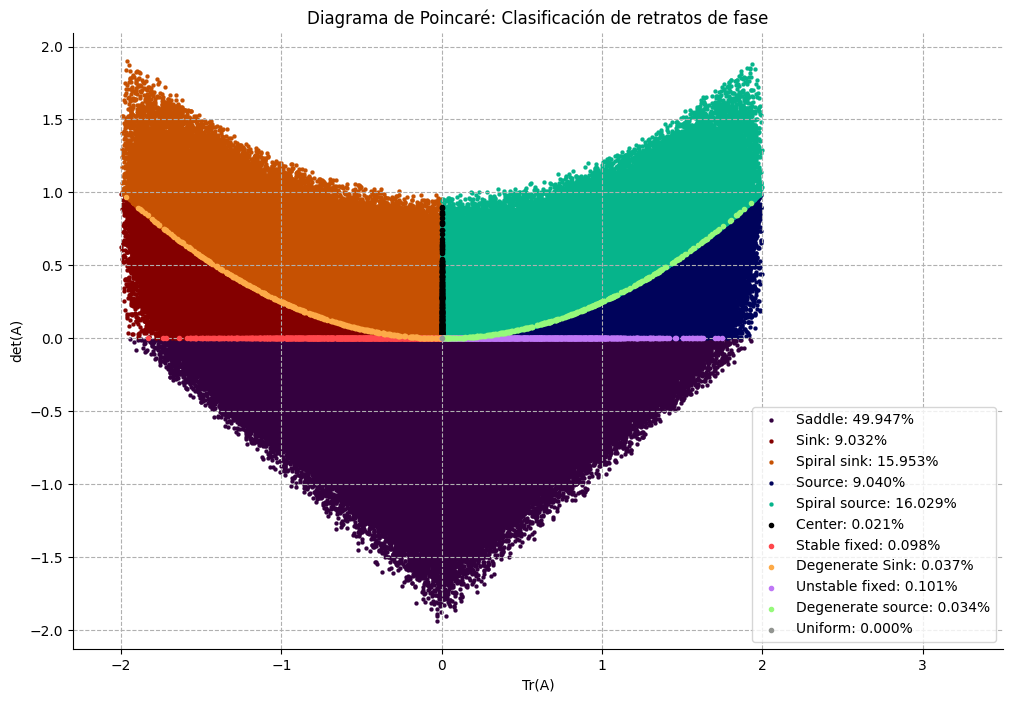

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,8))

matrixplot(ax1,tr,det,type_area, type_line)
style(ax1, 'Tr(A)', 'det(A)', 'Diagrama de Poincaré: Clasificación de retratos de fase')

#fig.savefig('matrixspectra.png', dpi=300)   # La exportación se hizo en PNG y se covirtió manualmente porque si se exportaba en PDF el archivo resultante era ridículamente pesado